
## NFL vs Rugby ##


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

Image URL's acquired using method found in [fast.ai lesson 2 ](https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson2-download.ipynb)
```

urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```


In [3]:
#Set path
path = Path('data/nfl_vs_rugby')
#Copy data to path
path.mkdir(parents=True, exist_ok=True)
!cp  ../input/nflrugbyurlpg1/* {path}/


In [4]:
folder = 'nfl'
file = 'nfl.csv'
dest = path/folder
#Make NFL folder
dest.mkdir(parents=True, exist_ok=True)
#download 200 images NFL
download_images(path/file, dest, max_pics=200)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [5]:
folder = 'rugby'
file = 'rugby.csv'
dest = path/folder
#Make rugby  folder
dest.mkdir(parents=True, exist_ok=True)
#download 200 images Rugby
download_images(path/file, dest, max_pics=200)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [6]:
path.ls()

[PosixPath('data/nfl_vs_rugby/rugby'),
 PosixPath('data/nfl_vs_rugby/nfl'),
 PosixPath('data/nfl_vs_rugby/rugby.csv'),
 PosixPath('data/nfl_vs_rugby/nfl.csv')]

In [7]:
#set rugby path
path_rugby=path/'rugby'
#set nfl path
path_nfl=path/'nfl'


In [8]:
#check nfl path
nfl_names=get_image_files(path_nfl)
nfl_names[:5]

[PosixPath('data/nfl_vs_rugby/nfl/00000034.jpg'),
 PosixPath('data/nfl_vs_rugby/nfl/00000035.jpg'),
 PosixPath('data/nfl_vs_rugby/nfl/00000020.jpg'),
 PosixPath('data/nfl_vs_rugby/nfl/00000135.jpg'),
 PosixPath('data/nfl_vs_rugby/nfl/00000125.jpg')]

In [9]:
#check rugby path
rugby_names=get_image_files(path_rugby)
rugby_names[:5]

[PosixPath('data/nfl_vs_rugby/rugby/00000034.jpg'),
 PosixPath('data/nfl_vs_rugby/rugby/00000035.jpg'),
 PosixPath('data/nfl_vs_rugby/rugby/00000020.jpg'),
 PosixPath('data/nfl_vs_rugby/rugby/00000135.jpg'),
 PosixPath('data/nfl_vs_rugby/rugby/00000125.jpg')]

In [10]:
classes = ['nfl','rugby']

Then we can remove any images that can't be opened:

In [11]:
 for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

nfl


Image data/nfl_vs_rugby/nfl/00000022.jpg has 1 instead of 3 channels
rugby


## View data

In [12]:
np.random.seed(42)
#make all images the same size 224 works but why?
data = ImageDataBunch.from_folder(path,train=".", valid_pct=0.2,
         ds_tfms=get_transforms(), size=224, num_workers=0)

data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList
y: CategoryList (256 items)
[Category rugby, Category rugby, Category rugby, Category rugby, Category rugby]...
Path: data/nfl_vs_rugby
x: ImageItemList (256 items)
[Image (3, 168, 299), Image (3, 183, 275), Image (3, 183, 275), Image (3, 205, 246), Image (3, 185, 273)]...
Path: data/nfl_vs_rugby;

Valid: LabelList
y: CategoryList (63 items)
[Category rugby, Category nfl, Category rugby, Category nfl, Category rugby]...
Path: data/nfl_vs_rugby
x: ImageItemList (63 items)
[Image (3, 168, 299), Image (3, 183, 275), Image (3, 183, 275), Image (3, 300, 168), Image (3, 183, 275)]...
Path: data/nfl_vs_rugby;

Test: None

In [13]:
data.classes
#number of classes
data.c


2

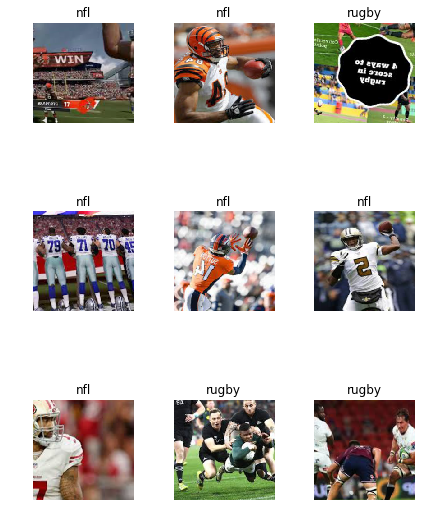

In [14]:
#always take a look
data.show_batch(rows=3, figsize=(6,8))

In [15]:
#convolutional neural netowrk
#1 data bunch
#2 model architechture
# metrics things that get printed out as it goes on
# download resnet 34 pre train weights
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 44050861.84it/s]


* -Transfer learning
* -take something that knows something already
* -take pretrained model and fit it
* -trains faster
* -databunch automatically created validation set

In [16]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.828266,0.455218,0.190476
2,0.660395,0.345226,0.126984
3,0.493651,0.318332,0.111111
4,0.405471,0.309714,0.111111


* -read one cycle learning paper

In [17]:
# save current model 'stage-1'
learn.save('stage-1')

In [18]:
learn.unfreeze()

In [19]:
#find learning rate
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


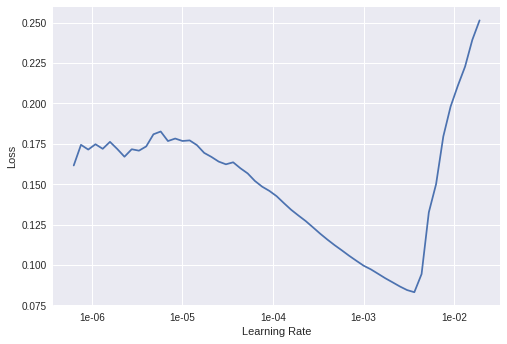

In [20]:
#to see error rate graph
plt.style.use('seaborn')
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate
1,0.209287,0.399642,0.111111
2,0.141874,0.498379,0.111111


In [22]:
learn.save('stage-2')

## Interpretation

In [24]:
learn.load('stage-2');

In [25]:
interp = ClassificationInterpretation.from_learner(learn)

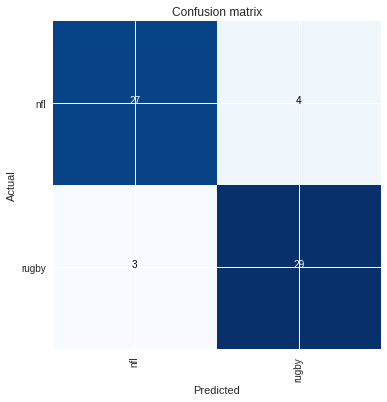

In [26]:
interp.plot_confusion_matrix()

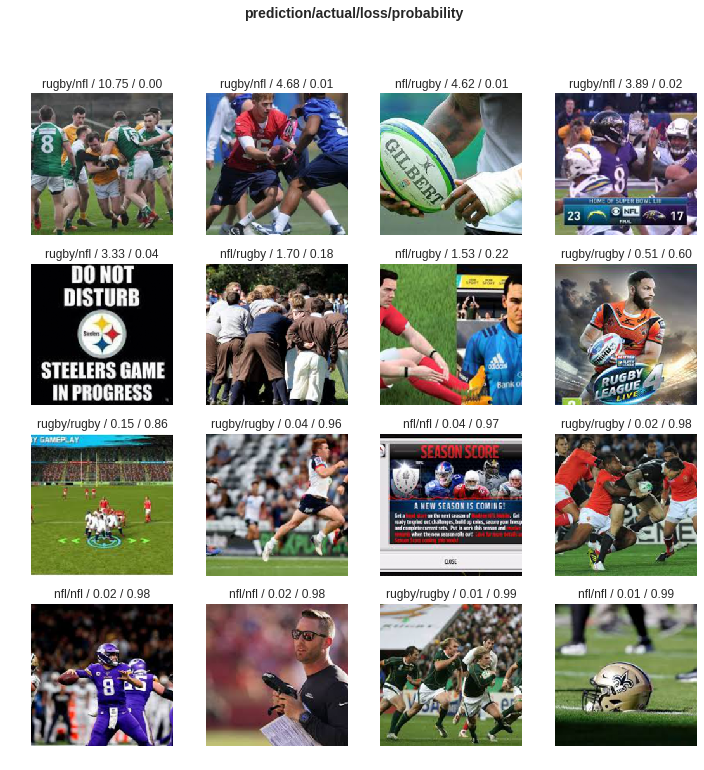

In [27]:
interp.plot_top_losses(16)

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `ImageCleaner` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

In [28]:
from fastai.widgets import *

First we need to get the file paths from our top_losses. We can do this with `.from_toplosses`. We then feed the top losses indexes and corresponding dataset to `ImageCleaner`.

Notice that the widget will not delete images directly from disk but it will create a new csv file `cleaned.csv` from where you can create a new ImageDataBunch with the corrected labels to continue training your model.

Note: Please Set the Number of images to a number that you'd like to view:
ex: ```n_imgs=100```

In [29]:
ds, idxs = DatasetFormatter().from_toplosses(learn, n_imgs=100)

In [30]:
ImageCleaner(ds, idxs, path)

'No images to show :)'

Flag photos for deletion by clicking 'Delete'. Then click 'Next Batch' to delete flagged photos and keep the rest in that row. ImageCleaner will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from top_losses.ImageCleaner(ds, idxs)

You can also find duplicates in your dataset and delete them! To do this, you need to run .from_similars to get the potential duplicates' ids and then run ImageCleaner with duplicates=True. The API works in a similar way as with misclassified images: just choose the ones you want to delete and click 'Next Batch' until there are no more images left.

In [31]:
ds, idxs = DatasetFormatter().from_similars(learn)

Getting activations...


Computing similarities...


Remember to recreate your ImageDataBunch from your cleaned.csv to include the changes you made in your data!

In [32]:
np.random.seed(42)
#make all images the same size 224 works but why?
data_clean = ImageDataBunch.from_csv(path,csv_labels='cleaned.csv',ds_tfms=get_transforms(), size=224)

data_clean.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList
y: CategoryList (179 items)
[Category rugby, Category rugby, Category rugby, Category rugby, Category rugby]...
Path: data/nfl_vs_rugby
x: ImageItemList (179 items)
[Image (3, 183, 275), Image (3, 183, 275), Image (3, 205, 246), Image (3, 185, 273), Image (3, 163, 310)]...
Path: data/nfl_vs_rugby;

Valid: LabelList
y: CategoryList (44 items)
[Category rugby, Category rugby, Category nfl, Category nfl, Category nfl]...
Path: data/nfl_vs_rugby
x: ImageItemList (44 items)
[Image (3, 184, 274), Image (3, 267, 189), Image (3, 178, 284), Image (3, 171, 294), Image (3, 168, 299)]...
Path: data/nfl_vs_rugby;

Test: None

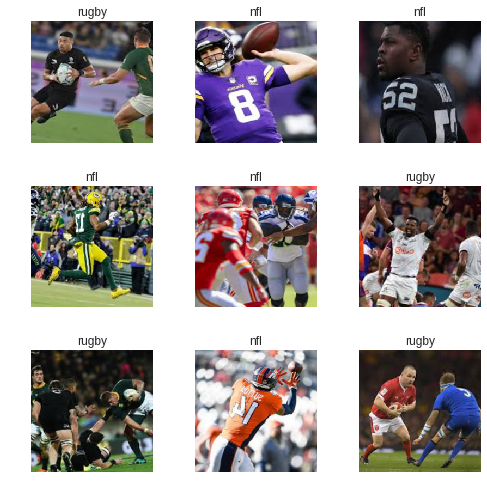

In [33]:
data_clean.show_batch(rows=3,figsize=(7,7))

## Putting your model in production
> 
You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [34]:
#import fastai
defaults.device = torch.device('cpu')


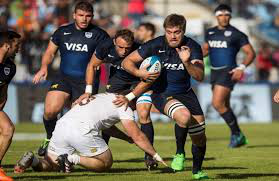

In [35]:
img = open_image(path/'rugby'/'00000000.jpg')
img

In [36]:
classes = ['nfl','rugby']

In [37]:
learn = create_cnn(data_clean, models.resnet34).load('stage-2')

In [39]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category rugby

In [43]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss
1,0.068328,0.000970
2,0.054888,0.000881


In [40]:
interp2 = ClassificationInterpretation.from_learner(learn)

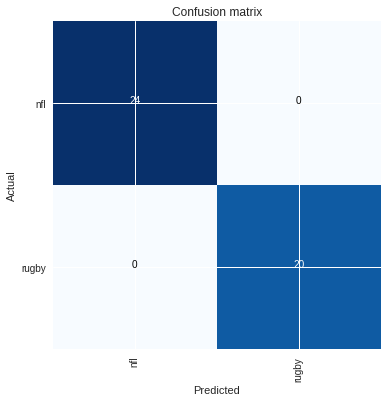

In [41]:
interp2.plot_confusion_matrix()

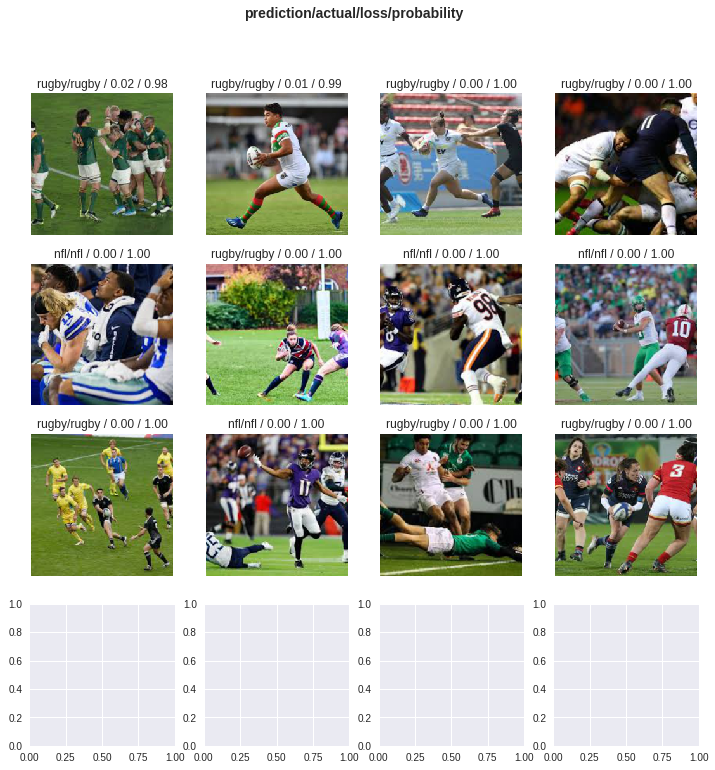

In [42]:
interp2.plot_top_losses(12)